### K-Means算法的应用与实现

1、使用sklearn中的方法进行聚类实验，处理给定数据集（3选1，各国幸福指数，汽车型号，青少年市场细分）（根据数据集具体情况进行预处理和数据集划分）。

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./dataset/2016_world_happiness.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [3]:
df=df.drop(['Region'],axis=1)
df

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [4]:
data=df.drop('Country',axis=1)
target=df['Country'].values
data.values

array([[1.00000e+00, 7.52600e+00, 7.46000e+00, ..., 4.44530e-01,
        3.61710e-01, 2.73939e+00],
       [2.00000e+00, 7.50900e+00, 7.42800e+00, ..., 4.12030e-01,
        2.80830e-01, 2.69463e+00],
       [3.00000e+00, 7.50100e+00, 7.33300e+00, ..., 1.49750e-01,
        4.76780e-01, 2.83137e+00],
       ...,
       [1.55000e+02, 3.30300e+00, 3.19200e+00, ..., 1.15870e-01,
        1.75170e-01, 2.13540e+00],
       [1.56000e+02, 3.06900e+00, 2.93600e+00, ..., 1.72330e-01,
        4.83970e-01, 8.17890e-01],
       [1.57000e+02, 2.90500e+00, 2.73200e+00, ..., 9.41900e-02,
        2.02900e-01, 2.10404e+00]])

In [5]:
target

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

In [6]:
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, rand_score
from sklearn.cluster import DBSCAN,KMeans
model=KMeans(n_clusters=4)
model.fit(data)
labels = model.predict(data)
nmi = normalized_mutual_info_score(target, labels)
ri = rand_score(target, labels)
silhouette_coefficient = silhouette_score(data, labels)
print("NMI: ", nmi)
print("RI: ", ri)
print("Silhouette Coefficient: ", silhouette_coefficient)


c:\Users\X2931\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI:  0.43030189019749543
RI:  0.7546954107463661
Silhouette Coefficient:  0.5597852793165456


In [7]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [8]:
len(data)

157

In [9]:
data.iloc[:,1]

0      7.526
1      7.509
2      7.501
3      7.498
4      7.413
       ...  
152    3.484
153    3.360
154    3.303
155    3.069
156    2.905
Name: Happiness Score, Length: 157, dtype: float64

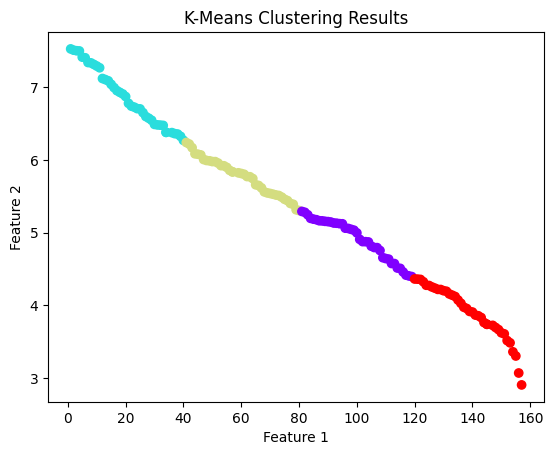

In [10]:
import matplotlib.pyplot as plt
# 绘制聚类结果的散点图
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2、实现基础的k-means算法，并进行对应数据集测试，和sklearn中的实验结果进行比较，附实验结果数据比较（表）。

In [11]:
import numpy as np

class KMEans:
    def __init__(self, k=2, max_iter=100):
        self.k = k  # 设定聚类数
        self.max_iter = max_iter  # 设定最大迭代次数
    
    def fit(self, X):
        m, n = X.shape  # 样本数和特征数
        self.centroids = X[np.random.choice(m, self.k, replace=False), :]  # 随机选取 k 个样本作为初始质心
        for i in range(self.max_iter):
            # 计算每个数据点到各个质心的距离
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            
            # 将每个数据点分配到距离最近的簇中
            labels = np.argmin(distances, axis=0)
            
            # 重新计算每个簇的质心
            for j in range(self.k):
                self.centroids[j] = X[labels == j].mean(axis=0)
        
        self.labels = labels
        
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)


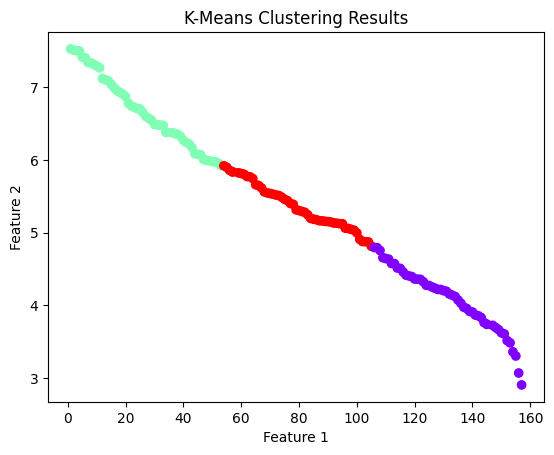

In [16]:

import matplotlib.pyplot as plt


# 初始化并训练KMeans模型
k2=KMEans(k=3, max_iter=100)
k2.fit(data.values)

# 获取每个样本的聚类标签
labels = k2.predict(data.values)

import matplotlib.pyplot as plt
# 绘制聚类结果的散点图
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

3、选做，尝试优化算法，进行聚类性能的改进。